#### Import Requirements

In [11]:
from qiskit_nature.second_q.drivers import PySCFDriver
from qiskit_nature.second_q.formats.molecule_info import MoleculeInfo
from qiskit_nature.second_q.transformers import ActiveSpaceTransformer
# from qiskit_nature.second_q.mappers import ParityMapper, QubitConverter
from qiskit.algorithms.optimizers import SLSQP, SPSA
from qiskit.primitives import Estimator
# from qiskit_nature.second_q.algorithms import VQEUCCFactory
from qiskit_nature.second_q.circuit.library import UCCSD
from qiskit_nature.second_q.algorithms import GroundStateEigensolver
import time, datetime
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit_nature.second_q.transformers import ActiveSpaceTransformer
# import openpyxl
# from openpyxl import Workbook
from qiskit_nature.second_q.mappers import JordanWignerMapper
from qiskit_algorithms import VQE, AdaptVQE
from qiskit_algorithms.optimizers import SLSQP
from qiskit.primitives import Estimator
from qiskit_nature.second_q.circuit.library import HartreeFock, UCCSD
import matplotlib.pyplot as plt 
import numpy as np

#### Setup Coordinates

In [2]:
coordinates = {}

coordinates[0] = [(0.0, 0.0, 0.0),(0.0, 0.0, 1.015264),(0.978541, 0.0, -0.270591),(-0.615359, 1.251464, -0.468292),(-0.885737, 1.801335, 0.341214),(0.779673, 2.334672, -1.406667)]
coordinates[1] = [(0.0, 0.0, 0.0),(0.0, 0.0, 1.015264),(0.978541, 0.0, -0.270591),(-0.615359, 1.251464, -0.468292),(-0.885737, 1.801335, 0.341214),(-0.022471, 1.711828, -0.867101)]
coordinates[2] = [(0.0, 0.0, 0.0),(0.0, 0.0, 1.015264),(0.978541, 0.0, -0.270591),(-0.615359, 1.251464, -0.468292),(-0.885737, 1.801335, 0.341214),(0.012405, 1.738908, -0.890561)]
coordinates[3] = [(0.0, 0.0, 0.0),(0.0, 0.0, 1.015264),(0.978541, 0.0, -0.270591),(-0.615359, 1.251464, -0.468292),(-0.885737, 1.801335, 0.341214),(0.047281, 1.765988, -0.91402)]
coordinates[4] = [(0.0, 0.0, 0.0),(0.0, 0.0, 1.015264),(0.978541, 0.0, -0.270591),(-0.615359, 1.251464, -0.468292),(-0.885737, 1.801335, 0.341214),(0.082157, 1.793068, -0.937479)]
coordinates[5] = [(0.0, 0.0, 0.0),(0.0, 0.0, 1.015264),(0.978541, 0.0, -0.270591),(-0.615359, 1.251464, -0.468292),(-0.885737, 1.801335, 0.341214),(0.117033, 1.820149, -0.960939)]
coordinates[6] = [(0.0, 0.0, 0.0),(0.0, 0.0, 1.015264),(0.978541, 0.0, -0.270591),(-0.615359, 1.251464, -0.468292),(-0.885737, 1.801335, 0.341214),(0.151908, 1.847229, -0.984398)]
coordinates[7] = [(0.0, 0.0, 0.0),(0.0, 0.0, 1.015264),(0.978541, 0.0, -0.270591),(-0.615359, 1.251464, -0.468292),(-0.885737, 1.801335, 0.341214),(0.186784, 1.874309, -1.007857)]
coordinates[8] = [(0.0, 0.0, 0.0),(0.0, 0.0, 1.015264),(0.978541, 0.0, -0.270591),(-0.615359, 1.251464, -0.468292),(-0.885737, 1.801335, 0.341214),(0.22166, 1.901389, -1.031317)]
coordinates[9] = [(0.0, 0.0, 0.0),(0.0, 0.0, 1.015264),(0.978541, 0.0, -0.270591),(-0.615359, 1.251464, -0.468292),(-0.885737, 1.801335, 0.341214),(0.256536, 1.928469, -1.054776)]
coordinates[10] = [(0.0, 0.0, 0.0),(0.0, 0.0, 1.015264),(0.978541, 0.0, -0.270591),(-0.615359, 1.251464, -0.468292),(-0.885737, 1.801335, 0.341214),(0.291412, 1.955549, -1.078236)]
coordinates[11] = [(0.0, 0.0, 0.0),(0.0, 0.0, 1.015264),(0.978541, 0.0, -0.270591),(-0.615359, 1.251464, -0.468292),(-0.885737, 1.801335, 0.341214),(0.326287, 1.98263, -1.101695)]
coordinates[12] = [(0.0, 0.0, 0.0),(0.0, 0.0, 1.015264),(0.978541, 0.0, -0.270591),(-0.615359, 1.251464, -0.468292),(-0.885737, 1.801335, 0.341214),(0.361163, 2.00971, -1.125154)]
coordinates[13] = [(0.0, 0.0, 0.0),(0.0, 0.0, 1.015264),(0.978541, 0.0, -0.270591),(-0.615359, 1.251464, -0.468292),(-0.885737, 1.801335, 0.341214),(0.396039, 2.03679, -1.148614)]
coordinates[14] = [(0.0, 0.0, 0.0),(0.0, 0.0, 1.015264),(0.978541, 0.0, -0.270591),(-0.615359, 1.251464, -0.468292),(-0.885737, 1.801335, 0.341214),(0.430915, 2.06387, -1.172073)]
coordinates[15] = [(0.0, 0.0, 0.0),(0.0, 0.0, 1.015264),(0.978541, 0.0, -0.270591),(-0.615359, 1.251464, -0.468292),(-0.885737, 1.801335, 0.341214),(0.465791, 2.09095, -1.195532)]
coordinates[16] = [(0.0, 0.0, 0.0),(0.0, 0.0, 1.015264),(0.978541, 0.0, -0.270591),(-0.615359, 1.251464, -0.468292),(-0.885737, 1.801335, 0.341214),(0.500666, 2.118031, -1.218992)]
coordinates[17] = [(0.0, 0.0, 0.0),(0.0, 0.0, 1.015264),(0.978541, 0.0, -0.270591),(-0.615359, 1.251464, -0.468292),(-0.885737, 1.801335, 0.341214),(0.535542, 2.145111, -1.242451)]
coordinates[18] = [(0.0, 0.0, 0.0),(0.0, 0.0, 1.015264),(0.978541, 0.0, -0.270591),(-0.615359, 1.251464, -0.468292),(-0.885737, 1.801335, 0.341214),(0.570418, 2.172191, -1.265911)]
coordinates[19] = [(0.0, 0.0, 0.0),(0.0, 0.0, 1.015264),(0.978541, 0.0, -0.270591),(-0.615359, 1.251464, -0.468292),(-0.885737, 1.801335, 0.341214),(0.605294, 2.199271, -1.28937)]
coordinates[20] = [(0.0, 0.0, 0.0),(0.0, 0.0, 1.015264),(0.978541, 0.0, -0.270591),(-0.615359, 1.251464, -0.468292),(-0.885737, 1.801335, 0.341214),(0.640169, 2.226351, -1.312829)]
coordinates[21] = [(0.0, 0.0, 0.0),(0.0, 0.0, 1.015264),(0.978541, 0.0, -0.270591),(-0.615359, 1.251464, -0.468292),(-0.885737, 1.801335, 0.341214),(0.675045, 2.253432, -1.336289)]
coordinates[22] = [(0.0, 0.0, 0.0),(0.0, 0.0, 1.015264),(0.978541, 0.0, -0.270591),(-0.615359, 1.251464, -0.468292),(-0.885737, 1.801335, 0.341214),(0.709921, 2.280512, -1.359748)]
coordinates[23] = [(0.0, 0.0, 0.0),(0.0, 0.0, 1.015264),(0.978541, 0.0, -0.270591),(-0.615359, 1.251464, -0.468292),(-0.885737, 1.801335, 0.341214),(0.744797, 2.307592, -1.383207)]
coordinates[24] = [(0.0, 0.0, 0.0),(0.0, 0.0, 1.015264),(0.978541, 0.0, -0.270591),(-0.615359, 1.251464, -0.468292),(-0.885737, 1.801335, 0.341214),(0.779673, 2.334672, -1.406667)]

#### VQE Algorithm

In [10]:
for i in range(1):
    driver = PySCFDriver.from_molecule(
        MoleculeInfo(["N", "H", "H", "N", "H", "H"], 
        coordinates[i],
        charge=0,
        multiplicity=1),
        basis='sto3g'
        # basis='631+g**'
    )
    problem = driver.run()
    print(problem.num_particles)
    # print(problem.num_parameters)
    print(problem.num_spatial_orbitals)

    transformer = ActiveSpaceTransformer(num_electrons=2, num_spatial_orbitals=2)
    transformed_problem = transformer.transform(problem)
    print(transformed_problem.num_particles)
    print(transformed_problem.num_spatial_orbitals)

    mapper = JordanWignerMapper()

    ansatz = UCCSD(
    transformed_problem.num_spatial_orbitals,
    transformed_problem.num_particles,
    mapper,
    initial_state=HartreeFock(
        transformed_problem.num_spatial_orbitals,
        transformed_problem.num_particles,
        mapper,
        ),
    )

    counts = []
    values = []

    def iteration_value(eval_count, parameters, mean, std):
        counts.append(eval_count)
        values.append(mean)

    vqe_solver = VQE(Estimator(), ansatz, SLSQP(), callback=iteration_value)
    vqe_solver.initial_point = [0.0] * ansatz.num_parameters

    calc = GroundStateEigensolver(mapper, vqe_solver)
    res = calc.solve(transformed_problem)
    print(res)


(9, 9)
14
(1, 1)
2
=== GROUND STATE ENERGY ===
 
* Electronic ground state energy (Hartree): -148.108916183516
  - computed part:      -1.004533447363
  - ActiveSpaceTransformer extracted energy part: -147.104382736154
~ Nuclear repulsion energy (Hartree): 38.534821130542
> Total ground state energy (Hartree): -109.574095052975
 
=== MEASURED OBSERVABLES ===
 
  0:  # Particles: 2.000 S: 0.000 S^2: 0.000 M: 0.000
 
=== DIPOLE MOMENTS ===
 
~ Nuclear dipole moment (a.u.): [-6.49127727  24.37038998  -6.80079173]
 
  0: 
  * Electronic dipole moment (a.u.): [-6.951709172907  24.411808516002  -7.914594279901]
    - computed part:      [0.209174019363  5.56967378992  -3.060307967513]
    - ActiveSpaceTransformer extracted energy part: [-7.16088319227  18.842134726082  -4.854286312388]
  > Dipole moment (a.u.): [0.460431902907  -0.041418536002  1.113802549901]  Total: 1.205930824096
                 (debye): [1.17030105387  -0.10527540778  2.83100343335]  Total: 3.065170127058
 


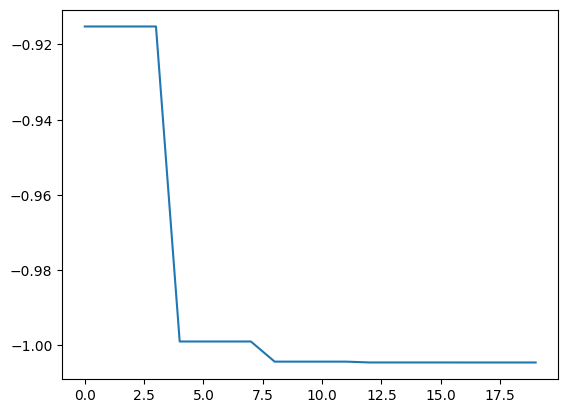

In [11]:
plt.plot(values)
config = [2,2]
file_path = f"data/N2H4_{config[0]}_{config[1]}.txt"
# Open the file in write mode
with open(file_path, "w") as file:
    # Write each element of the array to a new line
    for element in values:
        file.write(str(element) + "\n")

In [7]:
for i in range(1):
    driver = PySCFDriver.from_molecule(
        MoleculeInfo(["N", "H", "H", "N", "H", "H"], 
        coordinates[i],
        charge=0,
        multiplicity=1),
        basis='sto3g'
        # basis='631+g**'
    )
    problem = driver.run()
    print(problem.num_particles)
    # print(problem.num_parameters)
    print(problem.num_spatial_orbitals)

    transformer = ActiveSpaceTransformer(num_electrons=4, num_spatial_orbitals=4)
    transformed_problem = transformer.transform(problem)
    print(transformed_problem.num_particles)
    print(transformed_problem.num_spatial_orbitals)

    mapper = JordanWignerMapper()

    ansatz = UCCSD(
    transformed_problem.num_spatial_orbitals,
    transformed_problem.num_particles,
    mapper,
    initial_state=HartreeFock(
        transformed_problem.num_spatial_orbitals,
        transformed_problem.num_particles,
        mapper,
        ),
    )

    counts = []
    values = []

    def iteration_value(eval_count, parameters, mean, std):
        counts.append(eval_count)
        values.append(mean)

    vqe_solver = VQE(Estimator(), ansatz, SLSQP(), callback=iteration_value)
    vqe_solver.initial_point = [0.0] * ansatz.num_parameters

    calc = GroundStateEigensolver(mapper, vqe_solver)
    res = calc.solve(transformed_problem)
    print(res)


(9, 9)
14
(2, 2)
4
=== GROUND STATE ENERGY ===
 
* Electronic ground state energy (Hartree): -148.143504703301
  - computed part:      -3.746050210938
  - ActiveSpaceTransformer extracted energy part: -144.397454492363
~ Nuclear repulsion energy (Hartree): 38.534821130542
> Total ground state energy (Hartree): -109.608683572759
 
=== MEASURED OBSERVABLES ===
 
  0:  # Particles: 4.000 S: 0.000 S^2: 0.000 M: 0.000
 
=== DIPOLE MOMENTS ===
 
~ Nuclear dipole moment (a.u.): [-6.49127727  24.37038998  -6.80079173]
 
  0: 
  * Electronic dipole moment (a.u.): [-7.128667982179  24.127387544117  -7.763001377534]
    - computed part:      [-1.110471659709  9.090643286662  -4.590323328837]
    - ActiveSpaceTransformer extracted energy part: [-6.018196322471  15.036744257454  -3.172678048697]
  > Dipole moment (a.u.): [0.637390712179  0.243002435883  0.962209647534]  Total: 1.179476370948
                 (debye): [1.620085440391  0.617650525544  2.445692745104]  Total: 2.997929620476
 


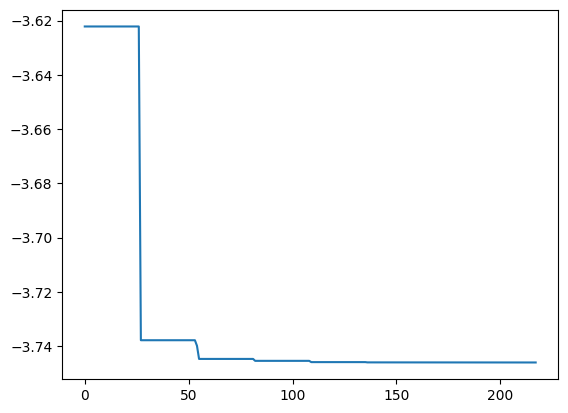

In [9]:
plt.plot(values)
config = [4,4]
file_path = f"data/N2H4_{config[0]}_{config[1]}.txt"
# Open the file in write mode
with open(file_path, "w") as file:
    # Write each element of the array to a new line
    for element in values:
        file.write(str(element) + "\n")

In [12]:
for i in range(1):
    driver = PySCFDriver.from_molecule(
        MoleculeInfo(["N", "H", "H", "N", "H", "H"], 
        coordinates[i],
        charge=0,
        multiplicity=1),
        basis='sto3g'
        # basis='631+g**'
    )
    problem = driver.run()
    print(problem.num_particles)
    # print(problem.num_parameters)
    print(problem.num_spatial_orbitals)

    transformer = ActiveSpaceTransformer(num_electrons=6, num_spatial_orbitals=6)
    transformed_problem = transformer.transform(problem)
    print(transformed_problem.num_particles)
    print(transformed_problem.num_spatial_orbitals)

    mapper = JordanWignerMapper()

    ansatz = UCCSD(
    transformed_problem.num_spatial_orbitals,
    transformed_problem.num_particles,
    mapper,
    initial_state=HartreeFock(
        transformed_problem.num_spatial_orbitals,
        transformed_problem.num_particles,
        mapper,
        ),
    )

    counts = []
    values = []

    def iteration_value(eval_count, parameters, mean, std):
        counts.append(eval_count)
        values.append(mean)

    vqe_solver = VQE(Estimator(), ansatz, SLSQP(), callback=iteration_value)
    vqe_solver.initial_point = [0.0] * ansatz.num_parameters

    calc = GroundStateEigensolver(mapper, vqe_solver)
    res = calc.solve(transformed_problem)
    print(res)


(9, 9)
14
(3, 3)
6
=== GROUND STATE ENERGY ===
 
* Electronic ground state energy (Hartree): -148.158045259932
  - computed part:      -8.201690025866
  - ActiveSpaceTransformer extracted energy part: -139.956355234066
~ Nuclear repulsion energy (Hartree): 38.534821130542
> Total ground state energy (Hartree): -109.623224129391
 
=== MEASURED OBSERVABLES ===
 
  0:  # Particles: 6.000 S: 0.000 S^2: 0.000 M: 0.000
 
=== DIPOLE MOMENTS ===
 
~ Nuclear dipole moment (a.u.): [-6.49127727  24.37038998  -6.80079173]
 
  0: 
  * Electronic dipole moment (a.u.): [-7.006281990904  24.087022769983  -7.748878827127]
    - computed part:      [-2.348072473213  10.84900046792  -5.622283945278]
    - ActiveSpaceTransformer extracted energy part: [-4.658209517691  13.238022302063  -2.126594881849]
  > Dipole moment (a.u.): [0.515004720904  0.283367210017  0.948087097127]  Total: 1.115524980448
                 (debye): [1.309011308334  0.720247538065  2.409796805833]  Total: 2.835381414702
 


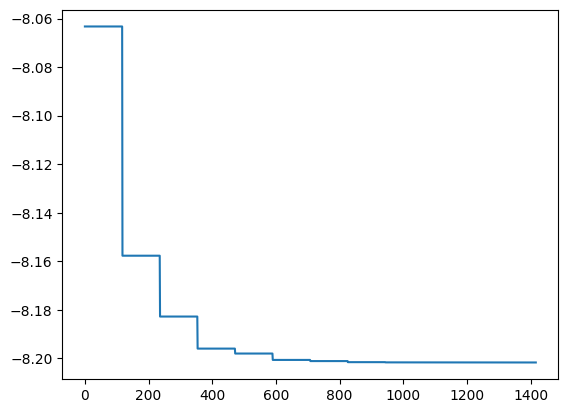

In [13]:
plt.plot(values)
config = [6,6]
file_path = f"data/N2H4_{config[0]}_{config[1]}.txt"
# Open the file in write mode
with open(file_path, "w") as file:
    # Write each element of the array to a new line
    for element in values:
        file.write(str(element) + "\n")

In [14]:
for i in range(1):
    driver = PySCFDriver.from_molecule(
        MoleculeInfo(["N", "H", "H", "N", "H", "H"], 
        coordinates[i],
        charge=0,
        multiplicity=1),
        basis='sto3g'
        # basis='631+g**'
    )
    problem = driver.run()
    print(problem.num_particles)
    # print(problem.num_parameters)
    print(problem.num_spatial_orbitals)

    transformer = ActiveSpaceTransformer(num_electrons=8, num_spatial_orbitals=8)
    transformed_problem = transformer.transform(problem)
    print(transformed_problem.num_particles)
    print(transformed_problem.num_spatial_orbitals)

    mapper = JordanWignerMapper()

    ansatz = UCCSD(
    transformed_problem.num_spatial_orbitals,
    transformed_problem.num_particles,
    mapper,
    initial_state=HartreeFock(
        transformed_problem.num_spatial_orbitals,
        transformed_problem.num_particles,
        mapper,
        ),
    )

    counts = []
    values = []

    def iteration_value(eval_count, parameters, mean, std):
        counts.append(eval_count)
        values.append(mean)

    vqe_solver = VQE(Estimator(), ansatz, SLSQP(), callback=iteration_value)
    vqe_solver.initial_point = [0.0] * ansatz.num_parameters

    calc = GroundStateEigensolver(mapper, vqe_solver)
    res = calc.solve(transformed_problem)
    print(res)


(9, 9)
14
(4, 4)
8


KeyboardInterrupt: 

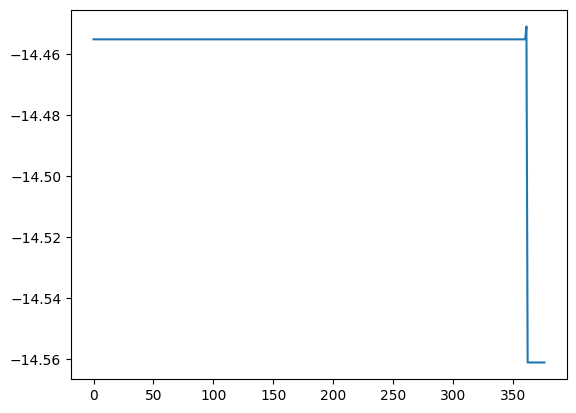

In [16]:
plt.plot(values)
config = [8,8]
file_path = f"data/N2H4_{config[0]}_{config[1]}.txt"
# Open the file in write mode
with open(file_path, "w") as file:
    # Write each element of the array to a new line
    for element in values:
        file.write(str(element) + "\n")

In [3]:
for i in range(1):
    driver = PySCFDriver.from_molecule(
        MoleculeInfo(["N", "H", "H", "N", "H", "H"], 
        coordinates[i],
        charge=0,
        multiplicity=1),
        basis='sto3g'
        # basis='631+g**'
    )
    problem = driver.run()
    print(problem.num_particles)
    # print(problem.num_parameters)
    print(problem.num_spatial_orbitals)

    transformer = ActiveSpaceTransformer(num_electrons=2, num_spatial_orbitals=4)
    transformed_problem = transformer.transform(problem)
    print(transformed_problem.num_particles)
    print(transformed_problem.num_spatial_orbitals)

    mapper = JordanWignerMapper()

    ansatz = UCCSD(
    transformed_problem.num_spatial_orbitals,
    transformed_problem.num_particles,
    mapper,
    initial_state=HartreeFock(
        transformed_problem.num_spatial_orbitals,
        transformed_problem.num_particles,
        mapper,
        ),
    )

    counts = []
    values = []

    def iteration_value(eval_count, parameters, mean, std):
        counts.append(eval_count)
        values.append(mean)

    vqe_solver = VQE(Estimator(), ansatz, SLSQP(), callback=iteration_value)
    vqe_solver.initial_point = [0.0] * ansatz.num_parameters

    calc = GroundStateEigensolver(mapper, vqe_solver)
    res = calc.solve(transformed_problem)
    print(res)


/home/azhar04/anaconda3/envs/quantum-dev/lib/python3.8/site-packages/pyscf/dft/libxc.py:772: UserWarning: Since PySCF-2.3, B3LYP (and B3P86) are changed to the VWN-RPA variant, the same to the B3LYP functional in Gaussian and ORCA (issue 1480). To restore the VWN5 definition, you can put the setting "B3LYP_WITH_VWN5 = True" in pyscf_conf.py
  warnings.warn('Since PySCF-2.3, B3LYP (and B3P86) are changed to the VWN-RPA variant, '


(9, 9)
14
(1, 1)
4
=== GROUND STATE ENERGY ===
 
* Electronic ground state energy (Hartree): -148.109279681702
  - computed part:      -1.004896945548
  - ActiveSpaceTransformer extracted energy part: -147.104382736154
~ Nuclear repulsion energy (Hartree): 38.534821130542
> Total ground state energy (Hartree): -109.57445855116
 
=== MEASURED OBSERVABLES ===
 
  0:  # Particles: 2.000 S: 0.000 S^2: 0.000 M: 0.000
 
=== DIPOLE MOMENTS ===
 
~ Nuclear dipole moment (a.u.): [-6.49127727  24.37038998  -6.80079173]
 
  0: 
  * Electronic dipole moment (a.u.): [-6.956479717965  24.412595963499  -7.91786348902]
    - computed part:      [0.204403474305  5.570461237417  -3.063577176632]
    - ActiveSpaceTransformer extracted energy part: [-7.16088319227  18.842134726082  -4.854286312388]
  > Dipole moment (a.u.): [0.465202447965  -0.042205983499  1.11707175902]  Total: 1.210803029991
                 (debye): [1.182426568792  -0.107276899487  2.839312933308]  Total: 3.077554038031
 


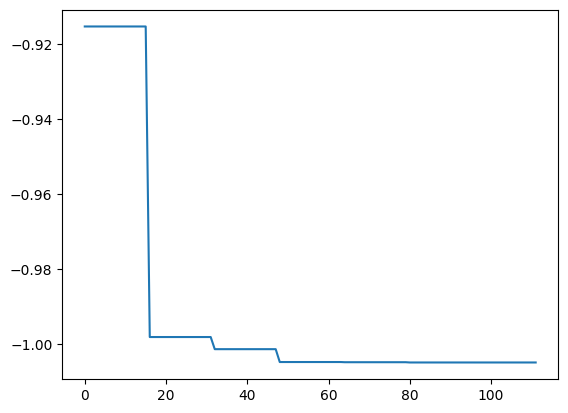

In [4]:
plt.plot(values)
config = [8,8]
file_path = f"data/N2H4_{config[0]}_{config[1]}.txt"
# Open the file in write mode
with open(file_path, "w") as file:
    # Write each element of the array to a new line
    for element in values:
        file.write(str(element) + "\n")

In [9]:
pes_energy = []
for i in range(len(coordinates)):
    driver = PySCFDriver.from_molecule(
        MoleculeInfo(["N", "H", "H", "N", "H", "H"], 
        coordinates[i],
        charge=0,
        multiplicity=1),
        # basis='sto3g'
        basis='631+g**'
    )
    problem = driver.run()
    print(problem.num_particles)
    # print(problem.num_parameters)
    print(problem.num_spatial_orbitals)

    transformer = ActiveSpaceTransformer(num_electrons=2, num_spatial_orbitals=2)
    transformed_problem = transformer.transform(problem)
    print(transformed_problem.num_particles)
    print(transformed_problem.num_spatial_orbitals)

    mapper = JordanWignerMapper()

    ansatz = UCCSD(
    transformed_problem.num_spatial_orbitals,
    transformed_problem.num_particles,
    mapper,
    initial_state=HartreeFock(
        transformed_problem.num_spatial_orbitals,
        transformed_problem.num_particles,
        mapper,
        ),
    )

    counts = []
    values = []

    def iteration_value(eval_count, parameters, mean, std):
        counts.append(eval_count)
        values.append(mean)

    vqe_solver = VQE(Estimator(), ansatz, SLSQP(), callback=iteration_value)
    vqe_solver.initial_point = [0.0] * ansatz.num_parameters

    calc = GroundStateEigensolver(mapper, vqe_solver)
    res = calc.solve(transformed_problem)
    print(res)
    pes_energy.append(values[-1])


(9, 9)
56
(1, 1)
2
=== GROUND STATE ENERGY ===
 
* Electronic ground state energy (Hartree): -149.565317034681
  - computed part:      -1.079517283729
  - ActiveSpaceTransformer extracted energy part: -148.485799750952
~ Nuclear repulsion energy (Hartree): 38.534821130542
> Total ground state energy (Hartree): -111.030495904139
 
=== MEASURED OBSERVABLES ===
 
  0:  # Particles: 2.000 S: 0.000 S^2: 0.000 M: 0.000
 
=== DIPOLE MOMENTS ===
 
~ Nuclear dipole moment (a.u.): [-6.49127727  24.37038998  -6.80079173]
 
  0: 
  * Electronic dipole moment (a.u.): [-7.05584173678  24.385015087476  -7.949080136195]
    - computed part:      [0.232733977821  5.395751089967  -2.8356681277]
    - ActiveSpaceTransformer extracted energy part: [-7.2885757146  18.989263997509  -5.113412008495]
  > Dipole moment (a.u.): [0.56456446678  -0.014625107476  1.148288406195]  Total: 1.2796535448
                 (debye): [1.434979605625  -0.037173311805  2.918657728609]  Total: 3.252554574552
 
(9, 9)
56
(1, 1

In [7]:
pes_energy

[-1.0045334473723242,
 -1.131764732645689,
 -1.1261824061607362,
 -1.1213081641467788,
 -1.116908749957093,
 -1.112677048846103,
 -1.1082769691707857,
 -1.1040799746896515,
 -1.0996651898807652,
 -1.0947782371056378,
 -1.0892241768750874,
 -1.08283334310835,
 -1.0754748295786525,
 -1.067090787223868,
 -1.0577449844603528,
 -1.0476766655994296,
 -1.0373375677199246,
 -1.0273796169282852,
 -1.018551075502065,
 -1.011513783750123,
 -1.0066493582290073,
 -1.0039533126607318,
 -1.0030745335334494,
 -1.003461866841564,
 -1.00453344737576]

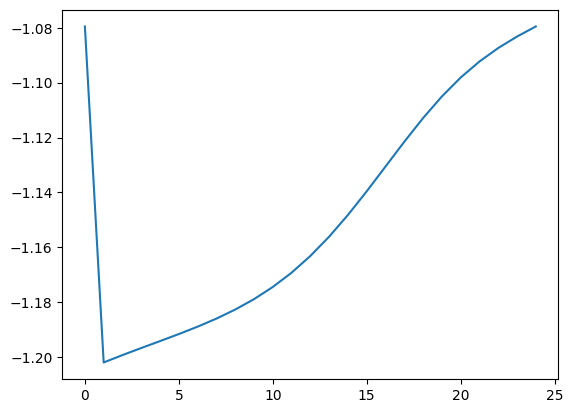

In [10]:
plt.plot(pes_energy)

In [13]:
# pes_energy = []
for i in range(1):
    driver = PySCFDriver.from_molecule(
        MoleculeInfo(["N", "H", "H", "N", "H", "H"], 
        coordinates[i],
        charge=0,
        multiplicity=1),
        # basis='sto3g'
        basis='631+g**'
    )
    problem = driver.run()
    print(problem.num_particles)
    # print(problem.num_parameters)
    print(problem.num_spatial_orbitals)

    transformer = ActiveSpaceTransformer(num_electrons=2, num_spatial_orbitals=2)
    transformed_problem = transformer.transform(problem)
    print(transformed_problem.num_particles)
    print(transformed_problem.num_spatial_orbitals)

    mapper = JordanWignerMapper()

    ansatz = UCCSD(
    transformed_problem.num_spatial_orbitals,
    transformed_problem.num_particles,
    mapper,
    initial_state=HartreeFock(
        transformed_problem.num_spatial_orbitals,
        transformed_problem.num_particles,
        mapper,
        ),
    )

    counts = []
    values = []

    def iteration_value(eval_count, parameters, mean, std):
        counts.append(eval_count)
        values.append(mean)

    vqe_solver = VQE(Estimator(), ansatz, SLSQP(), callback=iteration_value)
    
    adapt_vqe = AdaptVQE(vqe_solver)
    adapt_vqe.initial_point = [0.0] * ansatz.num_parameters

    calc = GroundStateEigensolver(mapper, vqe_solver)
    res = calc.solve(transformed_problem)
    print(res)
    # pes_energy.append(values[-1])


(9, 9)
56
(1, 1)
2
=== GROUND STATE ENERGY ===
 
* Electronic ground state energy (Hartree): -149.56531703454
  - computed part:      -1.079517283588
  - ActiveSpaceTransformer extracted energy part: -148.485799750952
~ Nuclear repulsion energy (Hartree): 38.534821130542
> Total ground state energy (Hartree): -111.030495903998
 
=== MEASURED OBSERVABLES ===
 
  0:  # Particles: 2.000 S: 0.000 S^2: 0.000 M: 0.000
 
=== DIPOLE MOMENTS ===
 
~ Nuclear dipole moment (a.u.): [-6.49127727  24.37038998  -6.80079173]
 
  0: 
  * Electronic dipole moment (a.u.): [-7.055842079279  24.385014649762  -7.949079841348]
    - computed part:      [0.232733635321  5.395750652253  -2.835667832853]
    - ActiveSpaceTransformer extracted energy part: [-7.2885757146  18.989263997509  -5.113412008495]
  > Dipole moment (a.u.): [0.564564809279  -0.014624669762  1.148288111348]  Total: 1.279653426325
                 (debye): [1.434980476172  -0.037172199248  2.918656979184]  Total: 3.252554273418
 
